<a href="https://colab.research.google.com/github/OleksandrDoskalchuk/hello-world/blob/main/Clustering_for_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

# Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
# Опишіть отримані результати

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = "/content/drive/MyDrive/main academy/датасеты/Mall_Customers.csv"
df = pd.read_csv(path)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
df = df.drop('CustomerID', axis=1)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [7]:
df = pd.get_dummies(df, columns=["Gender"])
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0


In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
X = StandardScaler().fit_transform(df)

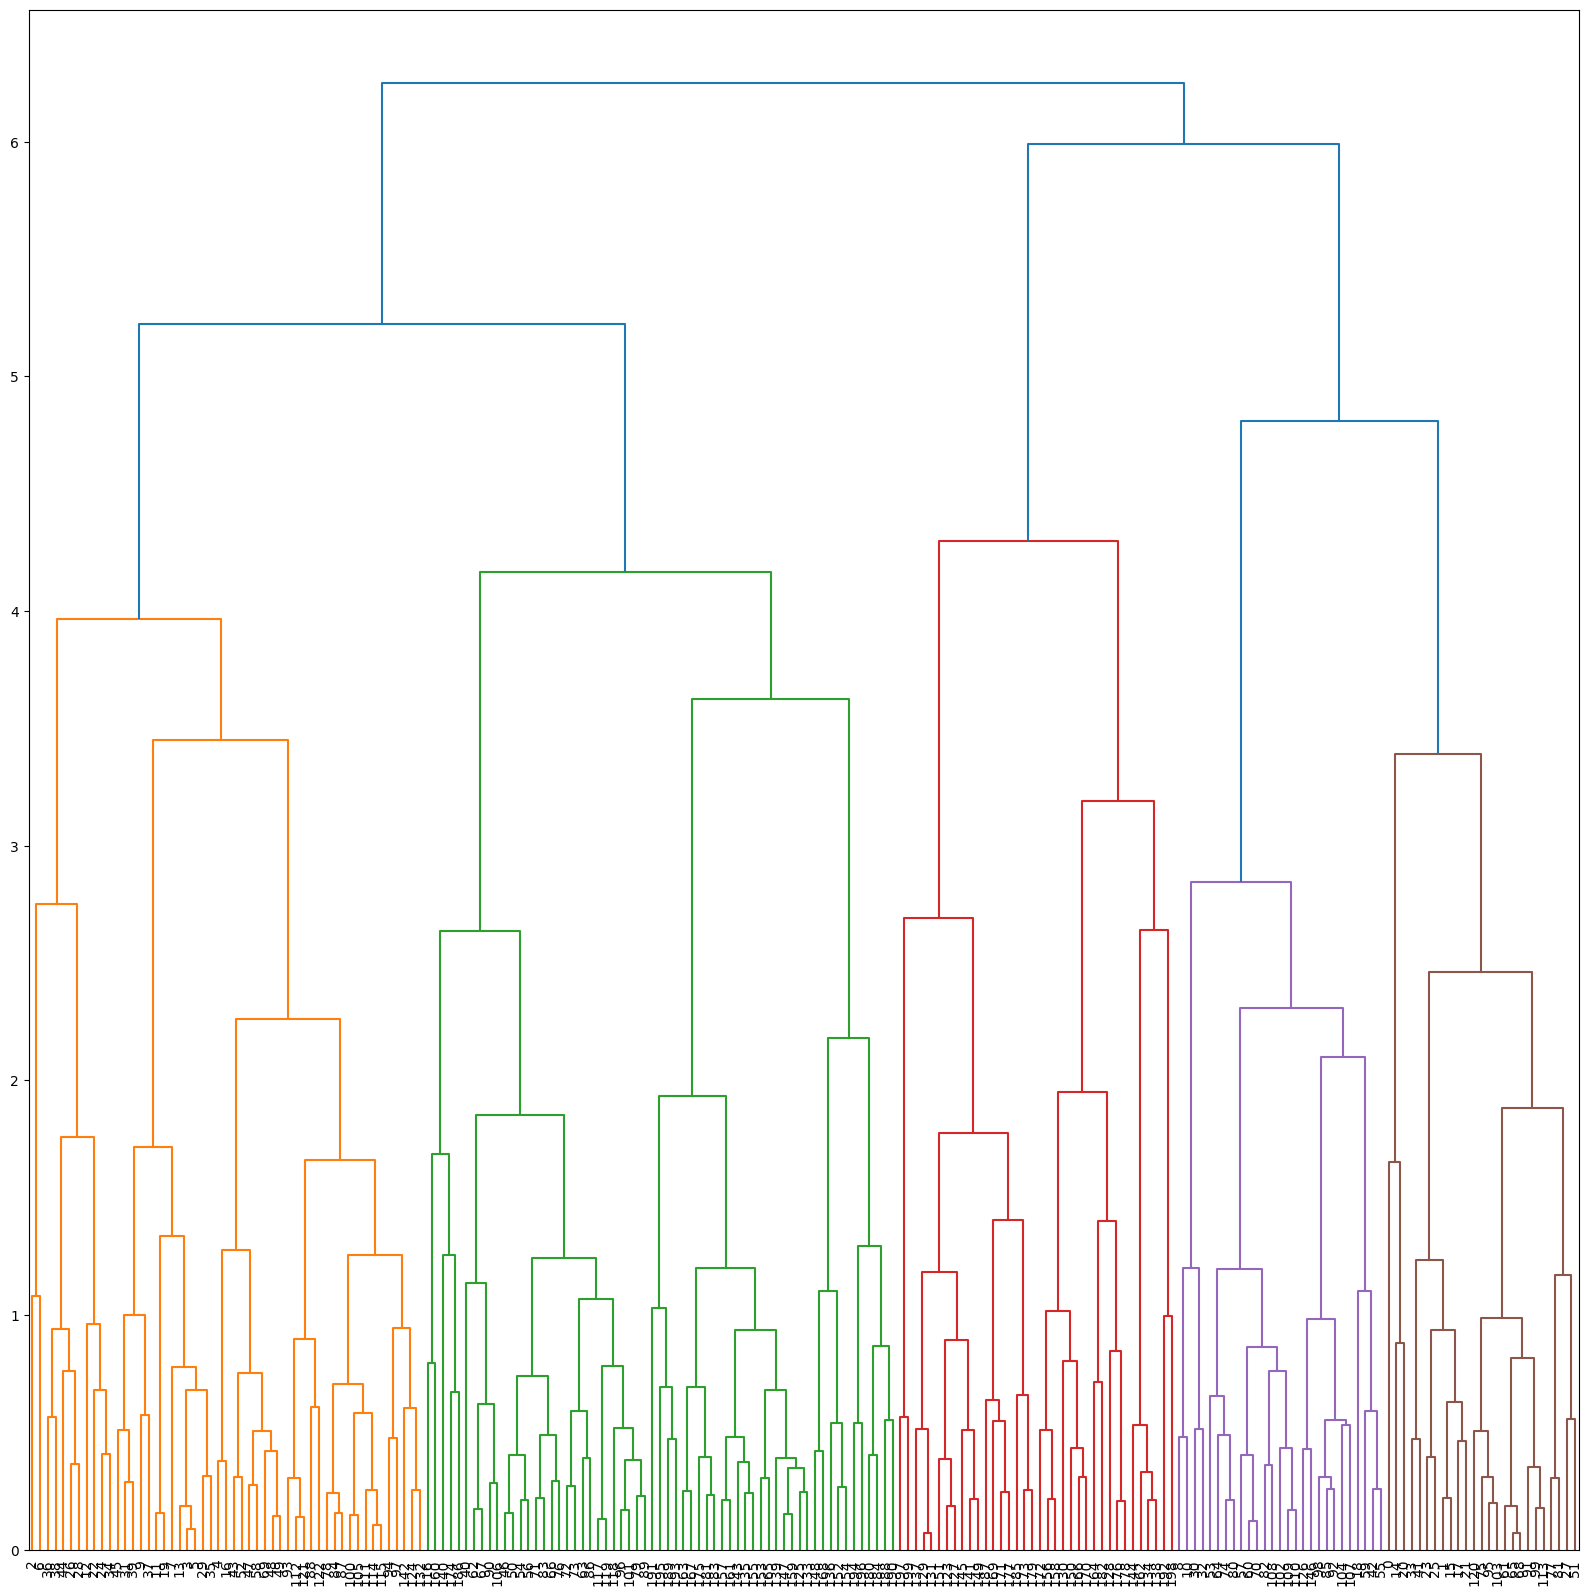

In [10]:
merging = linkage(X, method='complete')

dendrogram(merging, labels=df.index, leaf_font_size=10)

fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

Вивів дендограму,щоб подивитись наявність явного розбиттся на класи, поки що рішення про остаточну кількість кластерів не прияйнято, побачим що нам покаже графік з застосуванням 'правила локтя'.На даній дендограмі я б виділив 2, 4 кластера.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

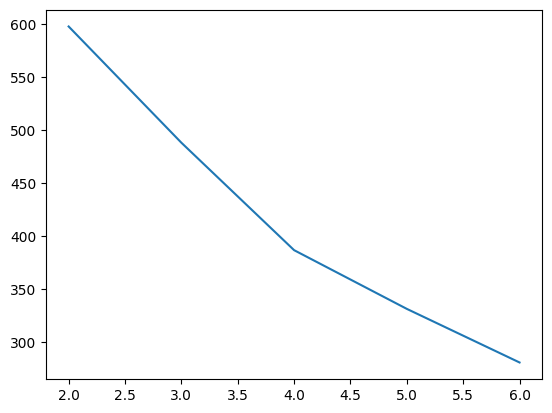

In [11]:
#@title Графік для визначення кількості кластерів
crit = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)

plt.plot(range(2,7), crit)
plt.show()

Застосував 'правило локтя' для визначення кількості кластерів - видно, що на кількості 4 лінія змінює кут спадання.Отже, розбиття буде на 4 кластера.

In [12]:
#@title Розбиття на кластери за допомогою методу KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
#@title Зменшення розмірності за допомогою методу PCA.Для двовимірної візуалізації зменшу ознаки до 2 компонентів
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
Q = pca.transform(X)

In [14]:
#@title Вивів накопичувану відносну дисперсію, пояснювану кожною компонентою
pca.explained_variance_ratio_.cumsum()

array([0.405211  , 0.66710328])

In [15]:
#@title "Навантаження" для кожної ознаки у кожній компоненті PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns[:])
loading_matrix

,PC1,PC2
Age,0.169176,0.797117
Annual Income (k$),0.105464,-0.104446
Spending Score (1-100),-0.165325,-0.797824
Gender_Female,-0.992260,0.128866
Gender_Male,0.992260,-0.128866


Вивів "Навантаження" для кожної ознаки у кожній компоненті PCA.Можна зробити такий висновок:
*   компонент PC1 відповідає за стать:
  *  додатні значення - чоловіки;
  *  від'ємні значення - жінки;
*   PC2 відповідає за вік та оцінку витрат:
  * чим більше значення PC2  - тим менша оцінка витрат
  * чим більше значення PC2 - тим більше вік.

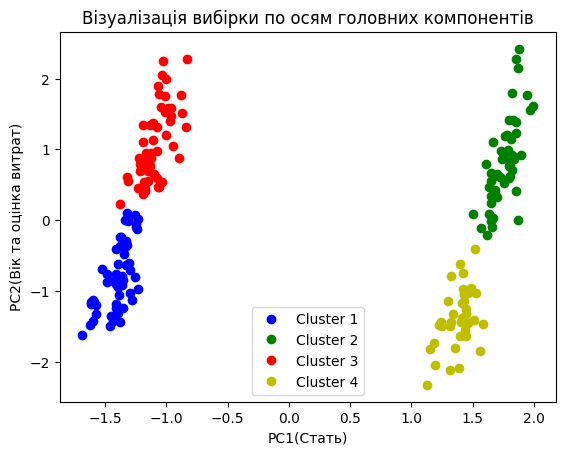

In [16]:
#@title Візуалізація вибірки по осям головних компонентів
plt.plot(Q[predicted_labels == 0, 0], Q[predicted_labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Q[predicted_labels == 1, 0], Q[predicted_labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Q[predicted_labels == 2, 0], Q[predicted_labels == 2, 1], 'ro', label='Cluster 3')
plt.plot(Q[predicted_labels == 3, 0], Q[predicted_labels == 3, 1], 'yo', label='Cluster 4')
plt.xlabel('PC1(Стать)')
plt.ylabel('PC2(Вік та оцінка витрат)')
plt.title('Візуалізація вибірки по осям головних компонентів')
plt.legend(loc=0);
plt.show()

1.   Cluster 1 - Чоловіки з меншою оцінкою витрат.(синій колір)
1.   Cluster 2 - Жінки з вищою оцінкою витрат.(зелений колір)
3.   Cluster 3 - Жінки з вищою оцінкою витрат.(червоний колір)
4.   Cluster 4 - Чоловіки з вищою оцінкою витрат.(жовтий колір)

In [17]:
df['cluster'] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,15,39,0,1,3
1,21,15,81,0,1,3
2,20,16,6,1,0,2
3,23,16,77,1,0,0
4,31,17,40,1,0,2


**Висновок**

Провів кластеризацію для датасету з клієнтами супермаркету.Визначив за якими основними ознаками поділено клієнтів на кластери.
1.   Cluster 1 - Чоловіки з меншою оцінкою витрат.(синій колір)
1.   Cluster 2 - Жінки з вищою оцінкою витрат.(зелений колір)
3.   Cluster 3 - Жінки з вищою оцінкою витрат.(червоний колір)
4.   Cluster 4 - Чоловіки з вищою оцінкою витрат.(жовтий колір)